# OOI temperature dataset - Oregon Coast

Import an OOI dataset. Background on the dataset we are importing [here](https://ooinet.oceanobservatories.org/data_access/?search=CE01ISSM-RID16-03-CTDBPC000) and [here](https://sensors.ioos.us/#metadata/103705/station) :

* Coastal endurance Array
* Platform: Oregon Inshore Surface Monitoring
* Instrument CTD. 

In [2]:
#Import erddap package into 
from erddapy import ERDDAP
# ooi constructor:

e = ERDDAP(
    server= " https://erddap.dataexplorer.oceanobservatories.org/erddap/",
    protocol="tabledap",
    response="csv",
)

e.dataset_id = "ooi-ce01issm-rid16-03-ctdbpc000"
e.variables = [
    "longitude",
    "latitude",
    "time",
    "sea_water_temperature"
]
e.constraints = {
    "time>=": "2017-01-13T00:00:00Z",
    "time<=": "2017-01-16T23:59:59Z",}


Check the URL

In [5]:
# Print the URL - check
url = e.get_download_url()
print(url)

 https://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-ce01issm-rid16-03-ctdbpc000.csv?longitude,latitude,time,sea_water_temperature&time>=1484265600.0&time<=1484611199.0


Import the dataset into the pandas dataframe and check the lay-out

In [7]:
# Convert URL to pandas dataframe
df_ooi = e.to_pandas( 
    parse_dates=True,
).dropna()

df_ooi.head()

,longitude (degrees_east),latitude (degrees_north),time (UTC),sea_water_temperature (degree_Celsius)
0,-124.09707,44.65678,2017-01-13T00:00:00Z,9.325062
1,-124.09707,44.65678,2017-01-13T00:15:00Z,9.294550
2,-124.09707,44.65678,2017-01-13T01:00:00Z,9.219658
3,-124.09707,44.65678,2017-01-13T01:15:00Z,9.220820
4,-124.09707,44.65678,2017-01-13T02:00:00Z,9.296882


# BCO-DMO temperature dataset - Oregon Coast

In [15]:
#Import erddap package into 
from erddapy import ERDDAP

e = ERDDAP(
    server= "https://erddap.bco-dmo.org/erddap/",
    protocol="tabledap",
    response="csv",
)

e.dataset_id = "bcodmo_dataset_817952"
e.variables = [
    "longitude",
    "latitude",
    "time",
    "Temperature"
]
e.constraints = {
    "time>=": "2017-01-13T00:00:00Z",
    "time<=": "2017-01-16T23:59:59Z",}

In [16]:
# Print the URL - check
url = e.get_download_url()
print(url)

https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_817952.csv?longitude,latitude,time,Temperature&time>=1484265600.0&time<=1484611199.0


Check your dataset in Pandas

In [21]:
# Convert URL to pandas dataframe
df_bcodmo = e.to_pandas(  
    parse_dates=True,
).dropna()

# print the dataframe to check what data is in there specifically. 
df_bcodmo.head()

# index_col="time (UTC)",
#print (df_bcodmo.columns)

,longitude (degrees_east),latitude (degrees_north),time (UTC),Temperature (degrees Celsius (\u00b0C))
1,-124.2675,44.6501,2017-01-13T03:03:00Z,9.32
2,-124.3432,44.6500,2017-01-13T03:26:00Z,10.72
3,-124.4943,44.6498,2017-01-13T04:13:00Z,10.58
4,-124.4899,44.6371,2017-01-13T05:00:00Z,10.67
5,-124.5320,44.6363,2017-01-13T05:46:00Z,10.59


Rename the columns to be able to use them in a graph together

In [19]:
df_bcodmo.rename(columns={df_bcodmo.columns.values[3]: 'temperature'}, inplace=True)
print (df_bcodmo.columns)

Index(['longitude (degrees_east)', 'latitude (degrees_north)', 'time (UTC)',
       'temperature'],
      dtype='object')


# Plotting the data

[Text(0, 0.5, 'degrees celsius')]

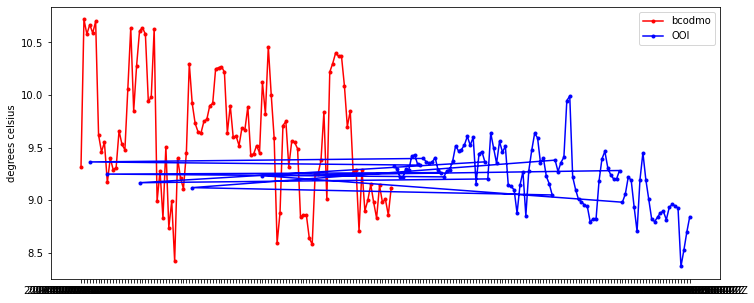

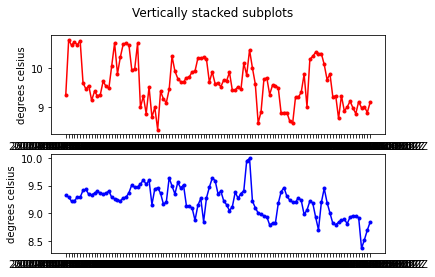

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5)) 
plt.plot(df_bcodmo["time (UTC)"],df_bcodmo['temperature'],label='bcodmo',c='red',marker='.',linestyle='-') 
plt.plot(df_ooi["time (UTC)"],df_ooi["sea_water_temperature (degree_Celsius)"],label='OOI',c='blue',marker='.',linestyle='-') 
plt.ylabel('degrees celsius')
plt.legend()
# plt.yticks(rotation=90)


fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(df_bcodmo["time (UTC)"],df_bcodmo['temperature'],label='bcodmo',c='red',marker='.',linestyle='-')
ax2.plot(df_ooi["time (UTC)"],df_ooi["sea_water_temperature (degree_Celsius)"],label='OOI',c='blue',marker='.',linestyle='-')
ax1.set(ylabel='degrees celsius')
ax2.set(ylabel='degrees celsius')

In [2]:
import xarray as xr

In [1]:
import netCDF4 as nc

 Importing the downloaded data in Python. 
Now that we've downloaded the data locally, we can import it and extract our variables of interest:

NameError: name 'xr' is not defined

In [28]:
#Import erddap package into 
from erddapy import ERDDAP

e = ERDDAP(
    server="https://coastwatch.pfeg.noaa.gov/erddap/",      	 	       protocol="griddap",
)
e.dataset_id = "jplG1SST"  



e.constraints = {
 "time>=": "2017-01-13T00:00:00Z",
 "time<=": "2017-01-16T23:59:59Z"
}

e.griddap_initialize()
#response="opendap",
#e.griddap_initialize()
#e.constraints["longitude"] >= -128.0
#e.constraints["longitude"] <= -121.0
#e.constraints["time"] = 2017

ds = e.to_xarray()
ds

HTTPError: Error {
    code=413;
    message="Payload Too Large: Your query produced too much data.  Try to request less data. [memory]  4943 MB is more than the .nc 2 GB limit.";
}


In [42]:
import xarray as xr

server = 'https://coastwatch.pfeg.noaa.gov/erddap'
protocol = 'griddap'
dataset_id = "jplG1SST"
full_URL = '/'.join([server,protocol,dataset_id])
print(full_URL)
da = xr.open_dataset(full_URL)

https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplG1SST


In [43]:
print (da)

<xarray.Dataset>
Dimensions:         (latitude: 16000, longitude: 36000, time: 2632)
Coordinates:
  * time            (time) object 2010-06-09 12:00:00 ... 2017-09-13 00:00:00
  * latitude        (latitude) float32 -79.995 -79.985 -79.975 ... 79.985 79.995
  * longitude       (longitude) float32 -179.995 -179.985 ... 179.985 179.995
Data variables:
    SST             (time, latitude, longitude) float32 ...
    mask            (time, latitude, longitude) float32 ...
    analysis_error  (time, latitude, longitude) float32 ...
Attributes:
    cdm_data_type:              Grid
    contact:                    Benyang.Tang@jpl.nasa.gov
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              Benyang.Tang@jpl.nasa.gov
    creator_name:               The JPL G1SST Team
    creator_type:               group
    creator_url:                http://sst.jpl.nasa.gov/SST/
    DSD_entry_id:               JPL_OUROCEAN-L4UHfnd-GLOB-G1SST
    Easternmost_Easting:        1

Getting the dataset without subsetting it creates an error. 

In [41]:
sst = da['SST']
sst

MemoryError: Unable to allocate 5.52 TiB for an array with shape (2632, 16000, 36000) and data type float32

MemoryError: Unable to allocate 5.52 TiB for an array with shape (2632, 16000, 36000) and data type float32

Create subsets of your netcdf file:

For this exercise, the area we are interested in includes Monterey Bay, CA:

- Latitude range: 44.0N, 48.0N
- Longitude range: -128E, -121E
- Time range 2017-01-13T00:00:00Z to 2017-01-16T23:59:59Z

In [12]:
import xarray as xr

server = 'https://coastwatch.pfeg.noaa.gov/erddap'
protocol = 'griddap'
dataset_id = "jplG1SST"
full_URL = '/'.join([server,protocol,dataset_id])
print(full_URL)
da = xr.open_dataset(full_URL)


sst = da['SST'].sel(  
                  latitude=slice(44., 48.),  
                  longitude=slice(-128, -121), 
                  time='2017-01-13T00:00:00'
                 )
sst



https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplG1SST


<xarray.DataArray 'SST' (time: 1, latitude: 400, longitude: 700)>
[280000 values with dtype=float32]
Coordinates:
  * time       (time) object 2017-01-13 00:00:00
  * latitude   (latitude) float32 44.005 44.015 44.025 ... 47.975 47.985 47.995
  * longitude  (longitude) float32 -127.995 -127.985 ... -121.015 -121.005
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    long_name:        Analysed Sea Surface Temperature
    standard_name:    sea_surface_temperature
    type:             foundation
    units:            degree_C
    valid_max:        45.0
    valid_min:        -9.0

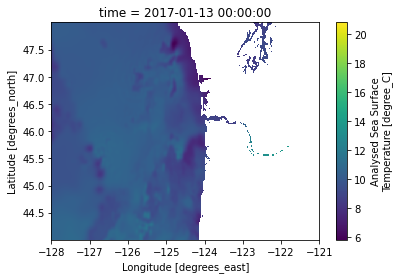

In [13]:
%matplotlib inline
sst.isel(time=0).plot.imshow()